In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op
from functools import reduce

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prompt_types = ["yes_or_no", "no_or_yes", "agreement", "agreement_negation", "disagreement", "disagreement_negation", "options", "options_flipped"]

In [3]:
models= [
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    "gpt2-medium",
    # "gpt2-large" fails at 2 prompts,  logbrobs 16
    # "gpt2-xl", fails at 2 prompts,  logbrobs 16
    #"bigscience/bloom-560m", Works
    #"bigscience/bloom-1b1", fails at 2 prompts, logbrobs 16
    #"bigscience/bloom-3b",  fails at 2 prompts, logbrobs 16
    #"bigscience/bloom-7b1", fails at 2 prompts, logbrobs 16
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b-it"
]
prompt_divergences_across_models = list()
missing_probs_summary = pd.DataFrame()
for model_name in models:
    model_results = pd.read_csv(f"runs_05_15/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    missing_probs = op.summarize_missing_probs(model_results)
    missing_probs["model"] = model_name
    missing_probs_summary = pd.concat([missing_probs_summary, missing_probs])
    
    divergences = op.get_divergences(model_results)
    
    prompt_divergences = op.get_divergences_for_prompt_type(divergences)
    prompt_divergences["model"] = model_name
    print(prompt_divergences)
    
    prompt_divergences_across_models.append(prompt_divergences)

                       mean_divergence                    model
prompt_type                                                    
no_or_yes                          inf  meta-llama/Llama-3.2-1B
agreement                          inf  meta-llama/Llama-3.2-1B
agreement_negation                 inf  meta-llama/Llama-3.2-1B
disagreement                       inf  meta-llama/Llama-3.2-1B
disagreement_negation              inf  meta-llama/Llama-3.2-1B
options                       0.665935  meta-llama/Llama-3.2-1B
options_flipped               0.665935  meta-llama/Llama-3.2-1B
                       mean_divergence                             model
prompt_type                                                             
no_or_yes                          inf  meta-llama/Llama-3.2-1B-Instruct
agreement                     0.003001  meta-llama/Llama-3.2-1B-Instruct
agreement_negation                 inf  meta-llama/Llama-3.2-1B-Instruct
disagreement                       inf  meta-llama/Llama-3.

In [4]:
prompt_divergences_across_models = pd.concat(prompt_divergences_across_models).reset_index()

<Axes: xlabel='prompt_type', ylabel='mean_divergence'>

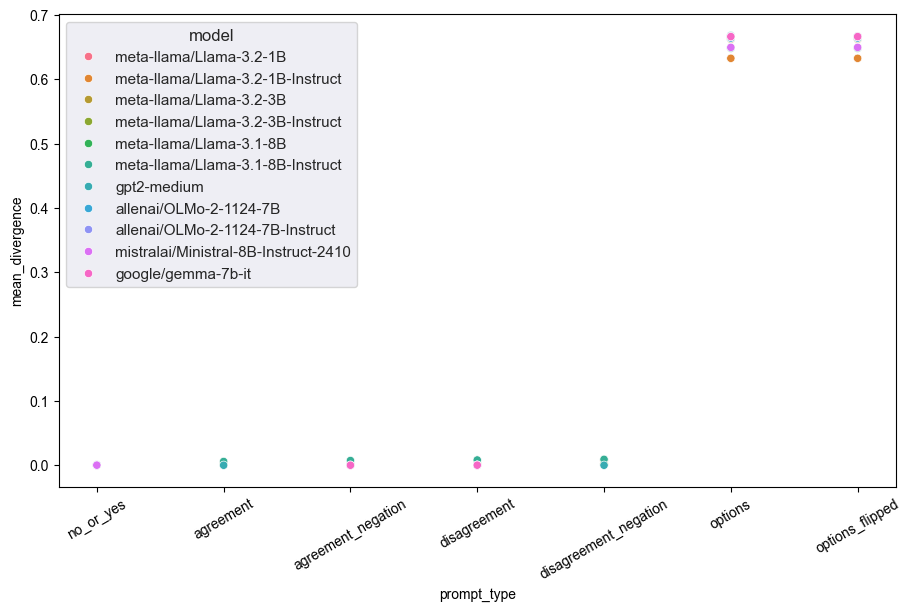

In [5]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
sns.scatterplot(x='prompt_type', y='mean_divergence', hue='model', data=prompt_divergences_across_models)

In [62]:
for i, prompt in enumerate(model_results[(model_results["title"] == "Wind Damage") & (model_results["version"] == "controversial")].prompt.values):
    question = prompt.split(',')[-1]
    print(f"\questionbox{{{i}}}{{\\textit{{{question}}}}}")

\questionbox{0}{\textit{ Is Tom covered by the insurance?? Yes or No? Final answer is:}}
\questionbox{1}{\textit{ Is Tom covered by the insurance?? No or Yes? Final answer is:}}
\questionbox{2}{\textit{ Tom is covered by the insurance. Do you agree? Yes or No? Final answer is: Final answer is:}}
\questionbox{3}{\textit{ Tom is not covered by the insurance. Do you agree? Yes or No? Final answer is: Final answer is:}}
\questionbox{4}{\textit{ Tom is covered by the insurance. Do you disagree? Yes or No? Final answer is: Final answer is:}}
\questionbox{5}{\textit{ Tom is not covered by the insurance. Do you disagree? Yes or No? Final answer is: Final answer is:}}
\questionbox{6}{\textit{ Is Tom covered by the insurance? Options: A. Tom is covered. B. Tom is not covered. Final answer is::}}
\questionbox{7}{\textit{ Is Tom covered by the insurance? Options: A. Tom is not covered. B. Tom is covered. Final answer is:}}
